In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline

### Read label file

In [2]:
label_file = "R_filtrid/BD_decomp_asi.txt"
galaxies_info = pd.read_table(label_file,header=None,index_col=False,skiprows=1)
part1 = galaxies_info.loc[galaxies_info[1].isnull(),[0,2,3,4,5,6]]
part1.columns = ["cnr","kval","varb","dust","popul","rescale"]
part2 = galaxies_info.loc[galaxies_info[1].notnull(),[0,1,2,3,4,5]]
part2.columns = ["cnr","kval","varb","dust","popul","rescale"]
galaxies_info = part1.append(part2)
galaxies_info.head()

,cnr,kval,varb,dust,popul,rescale
0,105,2.0,0,T,T,F
1,106,1.0,1,F,F,F
2,107,2.0,0.2,F,T,F
3,108,1.5,0,F,T,F
4,113,2.0,0,F,T,F


### Read crops

In [3]:
cropped_galaxies = pickle.load( open( "cropped_galaxies_v2.p", "rb" ) )

### Construct test dataset

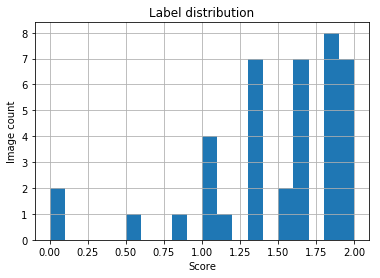

In [4]:
test = galaxies_info.sample(40, random_state=45)
test['kval'].hist(bins=20,figsize=(6,4))
plt.title("Label distribution")
plt.xlabel("Score")
plt.ylabel("Image count")

In [5]:
test

,cnr,kval,varb,dust,popul,rescale
51,201,0.8,0.3,F,F,F
682,2047,1.7,0,T,T,F
634,1960,1.5,0,F,T,F
234,932,1.6,0.3,T,T,F
76,356,1.3,0,T,T,F
317,1075,1.3,0.4,F,F,F
564,1842,1.3,0.2,F,T,F
66,291,2.0,0,T,T,F
441,1490,1.4,1,F,F,F
515,1750,2.0,0.1,F,T,F


In [6]:
test.index

Int64Index([ 51, 682, 634, 234,  76, 317, 564,  66, 441, 515, 427, 705,  84,
            629, 583, 513, 410, 146,   9, 137, 437, 416, 111, 628,  96,   4,
            353, 423, 472, 417, 214, 354, 124, 253,  89, 276, 541, 620, 281,
            258],
           dtype='int64')

In [7]:
np.array(test['cnr'])

array([ 201, 2047, 1960,  932,  356, 1075, 1842,  291, 1490, 1750, 1465,
       2089,  376, 1954, 1872, 1748, 1418,  623,  118,  564, 1483, 1442,
        454, 1952,  407,  113, 1139, 1461, 1538, 1443,  870, 1141,  525,
        967,  390, 1010, 1798, 1927, 1017,  976], dtype=int64)

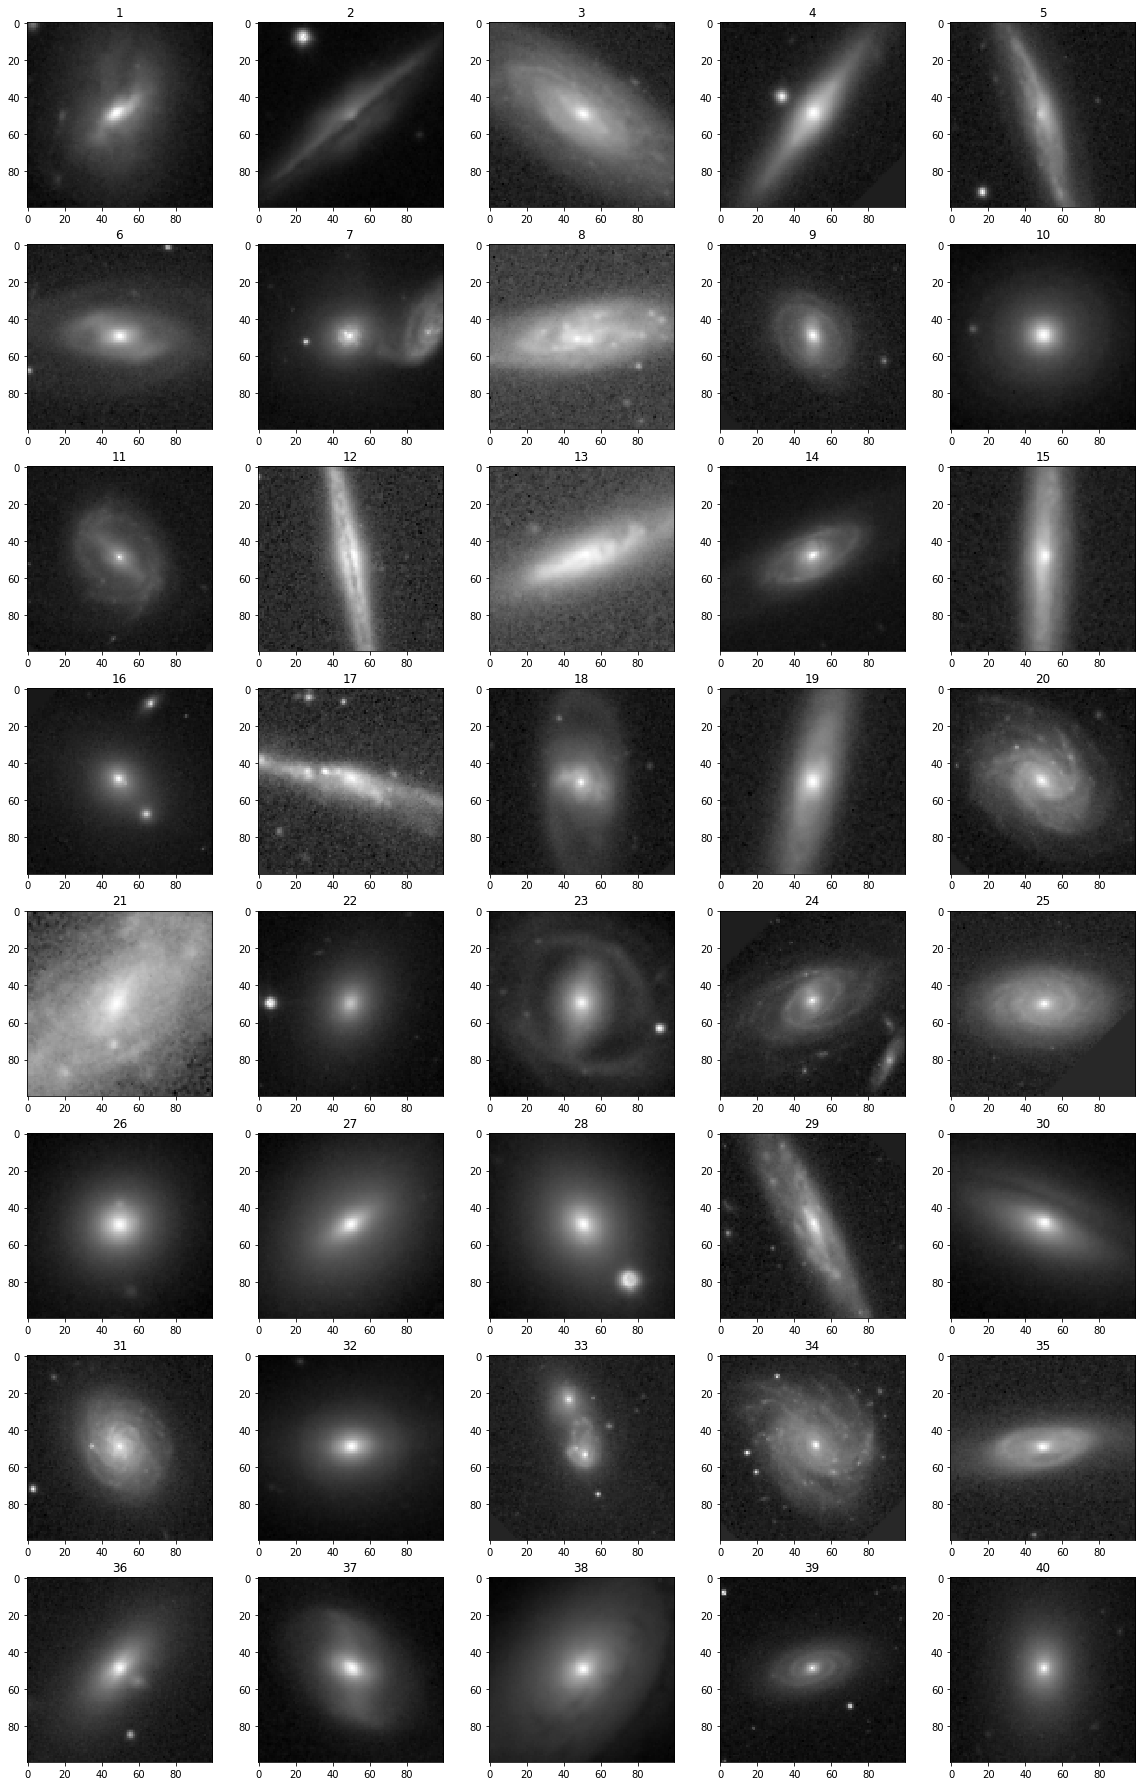

In [70]:
nc = 5
nr = 8
fig, ax = plt.subplots(nr,nc,figsize = (nc*4,nr*4))
for i in range(nr):
    for j in range(nc):
        ax[i][j].imshow(cropped_galaxies[test.index[i*nc+j]][2],cmap='gray')
        ax[i][j].set_title(str(i*nc+j+1))
        #ax[i][j].set_title(str(test['kval'].iloc[i*nc+j]))
plt.show()    
fig.savefig('test_galaxies.png', bbox_inches='tight')

In [8]:
test['new_kval'] = [0.8,1.5,1.9,1.6,1.6,1.9,0.5,1.7,1.8,2.0,1.3,1.6,1.8,1.3,1.8,1.9,1.3,1.4,2.0,1.9,
                    2.0,2.0,1.9,1.5,1.8,1.8,1.3,1.6,1.8,1.4,1.6,1.6,0.2,1.7,1.3,1.5,1.6,1.3,2.0,1.6]

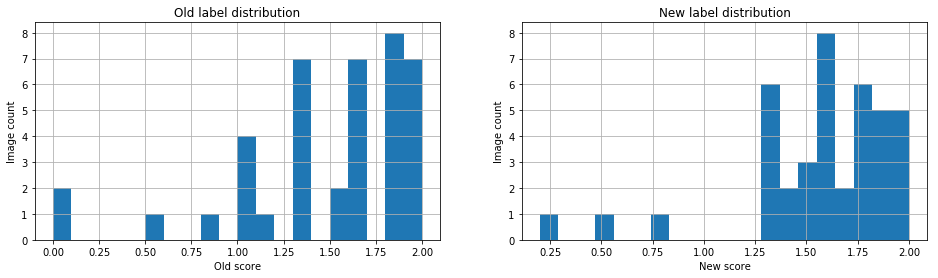

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,4))

test['kval'].hist(bins=20,ax=axes[0])
axes[0].set_title("Old label distribution")
axes[0].set_xlabel("Old score")
axes[0].set_ylabel("Image count")

test['new_kval'].hist(bins=20,ax=axes[1])
axes[1].set_title("New label distribution")
axes[1].set_xlabel("New score")
axes[1].set_ylabel("Image count")

In [10]:
test['difference'] = test['new_kval']-test['kval']
test

,cnr,kval,varb,dust,popul,rescale,new_kval,difference
51,201,0.8,0.3,F,F,F,0.8,0.0
682,2047,1.7,0,T,T,F,1.5,-0.2
634,1960,1.5,0,F,T,F,1.9,0.4
234,932,1.6,0.3,T,T,F,1.6,0.0
76,356,1.3,0,T,T,F,1.6,0.3
317,1075,1.3,0.4,F,F,F,1.9,0.6
564,1842,1.3,0.2,F,T,F,0.5,-0.8
66,291,2.0,0,T,T,F,1.7,-0.3
441,1490,1.4,1,F,F,F,1.8,0.4
515,1750,2.0,0.1,F,T,F,2.0,0.0


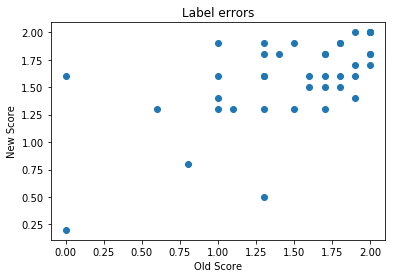

In [69]:
plt.plot(test['kval'],test['new_kval'],'o')
plt.title("Label errors")
plt.xlabel("Old Score")
plt.ylabel("New Score")

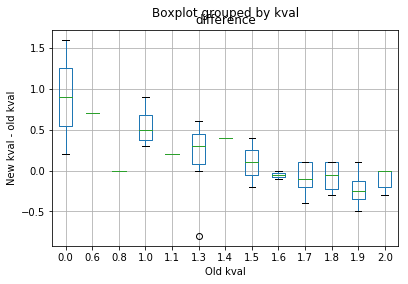

In [70]:
test.boxplot(column='difference',by='kval')
#plt.title("Label errors")
plt.xlabel("Old kval")
plt.ylabel("New kval - old kval")

In [11]:
# Human MSE
mean_squared_error(test['new_kval'],test['kval'])

0.18225000000000002